<a href="https://colab.research.google.com/github/bharaniakella/Deep_work/blob/main/multi_output_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import torch
import torch.nn as nn
from matplotlib import pyplot as plt
import numpy as np

In [48]:
import seaborn as sns
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [49]:
data=iris[iris.columns[0:4]].values

In [50]:
data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [51]:
data=torch.tensor(data).float()
data[0:5]

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000]])

In [52]:
labels=torch.zeros(len(iris),dtype=torch.long)

In [53]:
labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0])

In [54]:
labels[iris.species=='versicolor']=1
labels[iris.species=='virginica']=2

In [55]:
ann_iris=nn.Sequential(
    nn.Linear(4,64),
    nn.ReLU(),
    nn.Linear(64,64),
    nn.ReLU(),
    nn.Linear(64,3)
)
lr=0.05
loss_fun=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(ann_iris.parameters(),lr=lr)

In [56]:
num_epochs=1000
losses=torch.zeros(num_epochs)
ongoingAcc=[]
for epochi in range(num_epochs):
  yhat=ann_iris(data)
  loss=loss_fun(yhat,labels)
  losses[epochi]=loss

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  acc=torch.mean((torch.argmax(yhat,axis=1)==labels).float())
  ongoingAcc.append(acc)


In [57]:
prediction=ann_iris(data)
final_acc=torch.mean((torch.argmax(yhat,axis=1)==labels).float())
final_acc

tensor(0.9733)

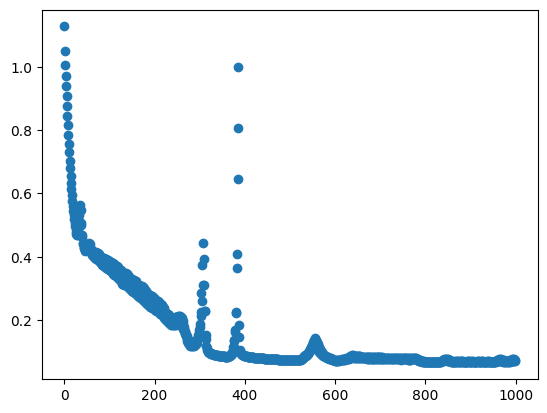

In [58]:
plt.plot(losses.detach(),'o')
plt.show()

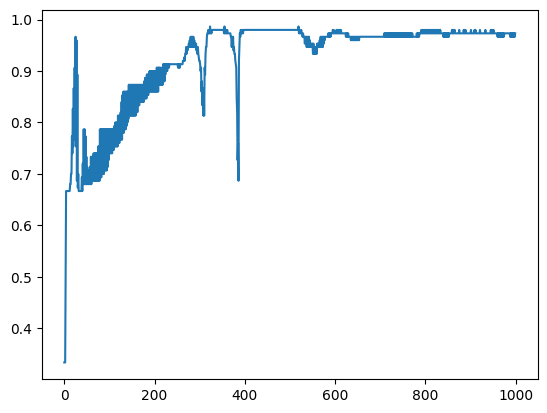

In [73]:
plt.plot(ongoingAcc)
plt.show()

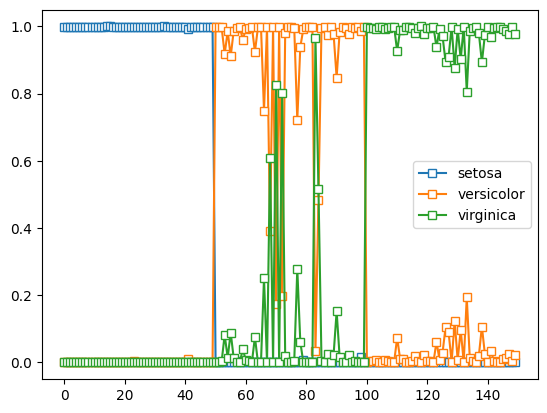

In [80]:
sm = nn.Softmax(1)
plt.plot(sm(prediction.detach()),'s-',markerfacecolor='w')
plt.legend(['setosa','versicolor','virginica'])
plt.show()